<center>Заметка 8. Вычисления над векторами, графика и линейная регрессия.</center>
<center>курса <q>Математический практикум по Питону</q>.</center>
<center>Шокуров Антон В.</center>
<center>shokurov.anton.v@yandex.ru</center>
<center>http://машинноезрение.рф</center>
<center>Версия 0.12</center>

<center>Аннотация</center>
<p>
Вводятся базовые элементы питона (Python версии 3.xx) на базе ключевых библиотек относящихся к анализу данных:
numpy и
    matplotlib.
</p>

<p>Это предварительная версия! Любые замечания приветствуются.</p>

<h1>Вычисления над векторами, матрицами</h1>

Списки хороши, но над ними как мы помним нельзя выполнять нужные нами арфиметических операций. В частности, списки нельзя складывать. Точнее эта операция будет иметь иное толкование:

In [1]:
import numpy as np
import math as mt

In [2]:
# Один из способов, как вычислить значение от каждого элемента списка, было показано выше.
# Показанный способ (отображение) был явный. Он был реализован на чистом питоне без вспомогательных средств.
# Но можно вычислить функцию от каждого элемента списка инче, использую вспомогательные (библиотечные) функции.
a = np.sin( [1.1, 2.2, -4.4] )
a
# Полученый объект уже не будет списоком (см. слово array). Он преврятится в массив, т.е. array.

array([0.89120736, 0.8084964 , 0.95160207])

In [3]:
ll = [1.1, 2.2, -4.4]
type( ll )

list

In [4]:
mt.sin( ll )

TypeError: must be real number, not list

In [5]:
dd = np.sin( ll )
type( dd )

numpy.ndarray

Тип array с точки зрения обычных языков фактически является массивом, т.е. объектом у которого тип элементов постоянен.
По суте идексируемая переменная (имеет тот же тип).
Такой тип соответсвует математическим понятиям вектора, матрице. Переменая с индексом.
В следующей заметке перейдем к описанию массивов.

In [6]:
[1.1, 2.2, -4.4] + [2.5, 1.9, 5.1] # Они совместяться в один список (контакенация)

[1.1, 2.2, -4.4, 2.5, 1.9, 5.1]

<h2>Формирование</h2>

<b>Создание</b>

Для содания списоков чисел, которые можно складывать поэлементно, нужны именно вектора/массивы.

In [7]:
# Они из списка создаются так:
np.array( [1.1, 2.2, -4.4])

array([ 1.1,  2.2, -4.4])

Размер массива всегда можно запросить у самого объекта.

In [8]:
l = np.array( [1.1, 2.2, -4.4]) # Сохраняем массив в переменную l.
l.shape # Запрашиваем у переменной её размер. Он хранится в атрибуте shape.

(3,)

In [9]:
len(l)

3

In [10]:
bb = [55, 22, 33] # Создаем список.
bb.shape # Размер имеют объекты array. Другие не обязаны давать значение на это поле.

AttributeError: 'list' object has no attribute 'shape'

Замечу, что тип размер/размерность не указывает. Последнее связано с тем, что все элементы массива должны иметь одтн и тот же тип.

In [11]:
type( l ) # Запросим и тип.

numpy.ndarray

In [12]:
l.dtype # Тип элементов массива.

dtype('float64')

<b>Тип элементов</b>

In [13]:
# В отличии от списка, все элементы массива должны иметь один и тот же тип.
# Если объявить так:
q = np.array( [1.0, "aa"] )
q

array(['1.0', 'aa'], dtype='<U32')

In [14]:
q[0]

'1.0'

In [15]:
type(q[0]), type(q[1]) # то число тоже станет строчкой.

(numpy.str_, numpy.str_)

In [16]:
q.dtype

dtype('<U32')

<b>Функцией</b>

In [17]:
np.zeros( 5 )

array([0., 0., 0., 0., 0.])

In [18]:
np.zeros((4,6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [19]:
np.zeros((5,))

array([0., 0., 0., 0., 0.])

In [20]:
np.ones( 3 )

array([1., 1., 1.])

In [21]:
np.ones((4,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [22]:
np.full( 2, 3)

array([3, 3])

In [23]:
np.full( (2, 3), 5)

array([[5, 5, 5],
       [5, 5, 5]])

Единичная

In [24]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

Диагонали

In [25]:
np.diagflat([1,2,3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [26]:
np.diagflat([1,2,3], 1)

array([[0, 1, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 3],
       [0, 0, 0, 0]])

In [27]:
np.diagflat([1,2], -2)

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 2, 0, 0]])

<b>Генератором</b>

In [28]:
l = range(3, 10) # Создаем список с 3 до 10 (не включительно) с шагом 1.
np.array( l ) # Создаем по списку массив.

array([3, 4, 5, 6, 7, 8, 9])

In [29]:
np.array(range(1,15.4,2))

TypeError: 'float' object cannot be interpreted as an integer

In [30]:
a = np.empty( (3, 4) )
a

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [31]:
it = (x*x/25 for x in range(5))

In [32]:
np.fromiter(it, float)

array([0.  , 0.04, 0.16, 0.36, 0.64])

In [33]:
np.fromfunction(lambda i, j: i == j, (3, 3), dtype=int)

array([[ True, False, False],
       [False,  True, False],
       [False, False,  True]])

In [34]:
np.fromfunction(lambda i, j: i - j, (3, 3))

array([[ 0., -1., -2.],
       [ 1.,  0., -1.],
       [ 2.,  1.,  0.]])

Их также можно генерировать готовой функцией. 

In [35]:
np.arange(2, 20, 3) # В данному слачае, это последовательность
# с первого числа (2) по последнее (20!!!), но не включая его, с шагом (3).

array([ 2,  5,  8, 11, 14, 17])

In [36]:
np.arange(2, 20.5, 1.5) # 20 vs 20.5

array([ 2. ,  3.5,  5. ,  6.5,  8. ,  9.5, 11. , 12.5, 14. , 15.5, 17. ,
       18.5, 20. ])

Существуют и другие вспомогательные функции для формирования массивов. Например функция равномерного разбиения отрезка.

In [37]:
# А эта функция создает числа с первого (4) по последнее (включительно) (25) в количестве (5).
l=np.linspace(4, 25, 5)
l

array([ 4.  ,  9.25, 14.5 , 19.75, 25.  ])

<h2>Индексы</h2>

<b>Сложные индексы</b>

In [38]:
l

array([ 4.  ,  9.25, 14.5 , 19.75, 25.  ])

In [39]:
l[2], type(l[2]) # Считываем значение и тип элемента массива.

(14.5, numpy.float64)

Упр. Проверить размер встроенного типа плавающая точка и numpy.float64.
т.е. берем 1 и делим на 2 пока не ноль. (ограничьте цикл 1000 итераций).
а) x = numpy.float64(1.0),
б) x = 1.0

In [40]:
x=(0.5)#**2000
type(x)

float

In [41]:
l[400] # Как и со списками нельзя обарщатся к эелементу, которого нет в массиве.

IndexError: index 400 is out of bounds for axis 0 with size 5

In [42]:
l[-1], l[1:-1:2] # Такая же история и сложными индексами.

(25.0, array([ 9.25, 19.75]))

In [43]:
l[2:4] = 4, 6
l

array([ 4.  ,  9.25,  4.  ,  6.  , 25.  ])

А вот так уже нельзя

In [44]:
l[2:4] = 4, 6, 7

ValueError: cannot copy sequence with size 3 to array axis with dimension 2

В списке было можно...

<b>Многомерный индекс</b>

In [45]:
m = np.diagflat([1,2,3])
m

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [46]:
m.shape

(3, 3)

In [47]:
m[0] # Первая строка

array([1, 0, 0])

In [48]:
m[0][1] = 2
m[0]

array([1, 2, 0])

In [49]:
m

array([[1, 2, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [50]:
m[1] # Вторая строка

array([0, 2, 0])

In [51]:
m[1][0] = -1
m[1]

array([-1,  2,  0])

In [52]:
m

array([[ 1,  2,  0],
       [-1,  2,  0],
       [ 0,  0,  3]])

Сразу двойной индекс

In [53]:
m[0, 1] # 0 строка, 1 столбец

2

In [54]:
m[1, 0] # 1 строка, 0 столбец

-1

In [55]:
m[:,1] # Столбец с индексом 1.

array([2, 2, 0])

In [56]:
m[:,-1] # Последний столбец

array([0, 0, 3])

In [57]:
m[1,-1]

0

Понятно что нельзя превосходить количество осей.

In [58]:
m[1,0,0]

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

<h2>Базовые операции</h2>

Операции над массивами по-элементны.

In [59]:
# Такие объекты, массивы, можно складывть по элементно.
np.array( [1.1, 2.2, -4.4]) + np.array( [2.5, -1.9, 5.1])

array([3.6, 0.3, 0.7])

In [60]:
# Размер массивов должен совпадать. Иначе система выдаст соответствующую ошибку.
np.array( [1.1, 2.2, -4.4]) + np.array( [2.5, -1.9, 5.1, 7.1])

ValueError: operands could not be broadcast together with shapes (3,) (4,) 

При выводе ошибки система указала, что один массив имеет размер 3, а другой -- 4. Даже была указана их одномерность.

Упр. По массиву значений построй массив отношения текущего элемента к последующему (результирующий массив будет на один 
элемент меньше).

In [61]:
a0 = np.array([-1, 2, 3])
a0

array([-1,  2,  3])

In [62]:
a1 = np.array([3, 5, -2])
a1

array([ 3,  5, -2])

In [63]:
a0 * a1 # Поэлементное умножение массивов, а не скалярное.

array([-3, 10, -6])

In [64]:
# Ну или в явном виде, т.е. без создания дополнительных промежуточных переменных.
np.array([-2, 7]) * np.array([ -2 , 5]) 

array([ 4, 35])

In [65]:
np.array( [1.0, "aa"] ) + np.array( [2.0, "bb"] ) # Сложить их как раньше не получится.

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

<h2>Вычисления над массивами</h2>

В библиотеке есть набор функций для обработки массивов. Так, помимо поэлеметных функий наподобии np.sin

In [66]:
l

array([ 4.  ,  9.25,  4.  ,  6.  , 25.  ])

In [67]:
l = np.array(l)
l

array([ 4.  ,  9.25,  4.  ,  6.  , 25.  ])

In [68]:
3*l

array([12.  , 27.75, 12.  , 18.  , 75.  ])

In [69]:
np.sin( l )

array([-0.7568025 ,  0.17388949, -0.7568025 , -0.2794155 , -0.13235175])

имеются и редуцирующие к числу. Например, 

In [70]:
np.sum( l ) # Сумма элементов

48.25

In [71]:
np.mean( l ), np.std( l ) # Срежнее значение и среднеквадратичное откланение.

(9.65, 7.911384202527394)

In [72]:
np.median( l ), np.max( l ), np.min( l ) # Медиана, максимальное и мимимальное значение.

(6.0, 25.0, 4.0)

Упр. По массиву посчитай скользящее среднее, т.е. среднее окна из например 10 элементов. Окно скользит по массиву.

In [73]:
import matplotlib.pyplot as plt

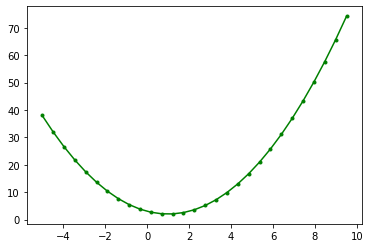

In [74]:
# Сгенерируем именно равномерный на набор точек.
x = np.linspace(-5, 9.5, 29)
y = x*x - 2*x + 3
plt.plot( x, y, 'g.-')

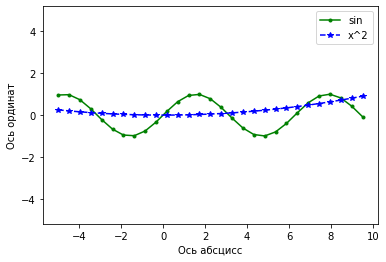

In [75]:
plt.plot( x, np.sin(x), 'g.-')
plt.plot(x, x*x/100, 'b*--')
plt.xlabel( "Ось абсцисс" )
plt.ylabel( "Ось ординат")
plt.axis('equal') # Чтобы оси были одного масштаба.
plt.legend( ['sin', 'x^2'] )

Построение узлов сеток

In [76]:
mesh = np.meshgrid([2,3],[3,4])
mesh

[array([[2, 3],
        [2, 3]]),
 array([[3, 3],
        [4, 4]])]

In [77]:
len(mesh), mesh[0].shape, mesh[1].shape

(2, (2, 2), (2, 2))

In [78]:
mesh[0] # x координаты
mesh[1] # y координаты

array([[3, 3],
       [4, 4]])

In [79]:
np.meshgrid([2,3,4],[3,4])

[array([[2, 3, 4],
        [2, 3, 4]]),
 array([[3, 3, 3],
        [4, 4, 4]])]

In [80]:
x = np.linspace(-5, 9.5, 5)
y = np.linspace(0, 40, 4)
grid = np.meshgrid( x, y )

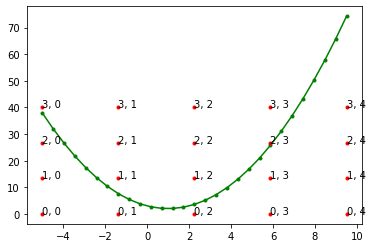

In [81]:
x = np.linspace(-5, 9.5, 29)
y = x*x - 2*x + 3
plt.plot( x, y, 'g.-')
# Нарисуем узлы сетки
for i in range(grid[0].shape[0]):
    for j in range(grid[0].shape[1]):
        plt.plot( [grid[0][i,j]], [grid[1][i,j]], 'r.' )
        plt.text( grid[0][i,j], grid[1][i,j], f'{i}, {j}' )

In [82]:
y = np.linspace(0, 40, 10)

In [83]:
grid = np.meshgrid( x, y )
len(grid), grid[0].shape, grid[1].shape

(2, (10, 29), (10, 29))

In [84]:
val = grid[0]*grid[0] - 2*grid[0] + 3
val.shape

(10, 29)

In [85]:
val[5, 13]

2.536033163265307

In [86]:
x_ = grid[0][5,13]
x_

1.7321428571428577

In [87]:
x_*x_ - 2*x_ + 3

2.536033163265307

In [88]:
gr = val > grid[1]
gr.shape, gr.dtype

((10, 29), dtype('bool'))

In [89]:
gr[5,13]

False

In [90]:
grid[1][5,13]

22.22222222222222

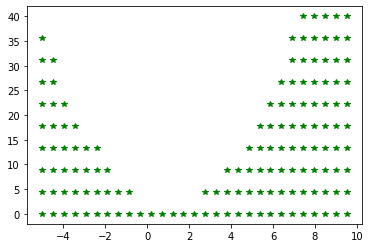

In [91]:
for i in range(10):
    for j in range(29):
        if gr[i,j]:
            plt.plot( [grid[0][i,j]], [grid[1][i,j]], 'g*' )

In [92]:
z = np.array([[1,2,3],[4,5,6]])
z

array([[1, 2, 3],
       [4, 5, 6]])

In [93]:
z.flatten()

array([1, 2, 3, 4, 5, 6])

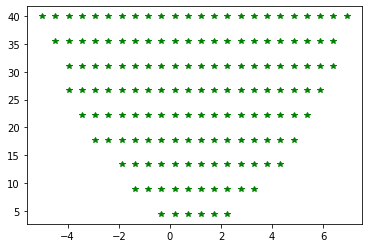

In [94]:
for i, z in enumerate(gr.flatten()):
    if z:
        continue
    plt.plot( [grid[0].flatten()[i]], [grid[1].flatten()[i]], 'g*' )

In [95]:
grid[0][gr].shape

(140,)

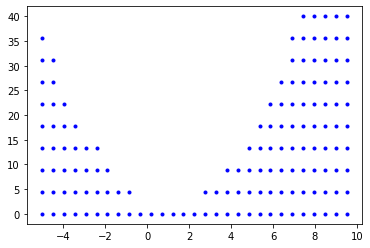

In [96]:
plt.plot( grid[0][gr], grid[1][gr], 'b.' )

In [97]:
x = np.linspace(-5, 9.5, 29)

In [98]:
fy1 = lambda x: x*x - 2*x + 3
fy2 = lambda x: x + 30

In [99]:
gr = fy1( grid[0] ) < grid[1]

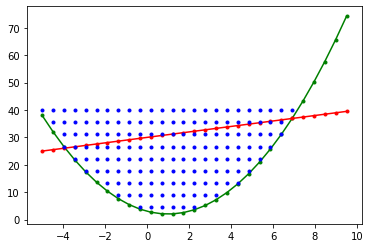

In [100]:
plt.plot( x, fy1(x), 'g.-')
plt.plot( x, fy2(x), 'r.-')
plt.plot( grid[0][gr], grid[1][gr], 'b.' )

In [101]:
gr = (fy1( grid[0] ) < grid[1]) & ( grid[1] < fy2( grid[0] ) )

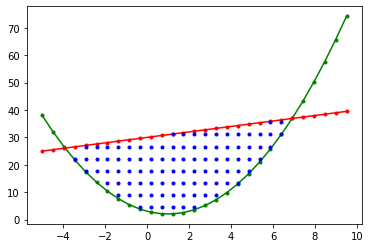

In [102]:
plt.plot( x, fy1(x), 'g.-')
plt.plot( x, fy2(x), 'r.-')
plt.plot( grid[0][gr], grid[1][gr], 'b.' )

<b>Функция от элементов</b>

In [103]:
dbl = lambda x: 2*x

In [104]:
dbl(l)

array([ 8. , 18.5,  8. , 12. , 50. ])

In [105]:
myabs = lambda x: x if x > 0 else -x

In [106]:
myabs(l)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [107]:
fmyabs= np.vectorize( myabs )

In [108]:
fmyabs(l)

array([ 4.  ,  9.25,  4.  ,  6.  , 25.  ])

In [109]:
np.apply_over_axes(dbl, l)

TypeError: _apply_over_axes_dispatcher() missing 1 required positional argument: 'axes'

<b>Произведение векторов</b>

In [110]:
# Скаляроне произведение.
a = np.array([ 1, 2, 3])
b = np.array([ -1, 0, 2])
np.inner( a, b) # Скяларное произведение

5

In [111]:
a * b # Поэлементное произведение векторов.

array([-1,  0,  6])

In [112]:
np.sum( a * b ) # Но можно и так.

5

In [113]:
# Матричное умножение.
np.dot(a, b)

5

In [114]:
# Сопряженное скалярное произведение.
a = np.array([ 1 + 2j, 3 + 4j])
b = np.array([ 1 - 2j, 3 + 4j])
np.vdot(a, b)

(22-4j)

In [115]:
c = a * b
c

array([ 5. +0.j, -7.+24.j])

In [116]:
np.dot( a.conjugate(), b )

(22-4j)

<b>Многомерные массивы</b>

In [117]:
# Расширение данной идеи на двумерные массивы.
a0 = np.array([[-1], [2]]) # На вторую размерность указывают вложенные скобки.
a0 # Отмечу, если раньше a0 был массивом, то теперь стал матрицей, т.е. поменялась размерность.

array([[-1],
       [ 2]])

In [118]:
a0.shape # Матрица 2 на 1!

(2, 1)

In [119]:
b0 = np.array([ [3] , [5]])
b0

array([[3],
       [5]])

In [120]:
# Размеры у матрицы a0 были:
a0.shape # т.е. две строки, в каждой из которых по одному элементу.

(2, 1)

In [121]:
a0 = np.array([[-1, 2]]) # Можно сделать матрицу наоборот (транспонирование). 
a0

array([[-1,  2]])

In [122]:
b0.shape, a0.shape

((2, 1), (1, 2))

In [123]:
np.array([[-1, 2]]) + np.array([3, 6])

array([[2, 8]])

In [124]:
np.dot(a0,b0)

array([[7]])

In [125]:
a0.shape # Одна строка, содержащая два элемента.

(1, 2)

In [126]:
# Матрицы можно формировать из других матриц.
a0 = np.array( [ 3, -6 ] )
a1 = np.array( [ -1, 2 ] )
a = np.array( [ a0, a1] )
a

array([[ 3, -6],
       [-1,  2]])

In [127]:
a.T # Можно транспонировать

array([[ 3, -1],
       [-6,  2]])

In [128]:
# Размеры должны конечно должны соответствовать.
a0 = np.array( [ 3, -6, 5 ] )
a1 = np.array( [ -1, 2 ] )
aa = np.array( [ a0, a1] )
aa # Иначе это бует массив объектов. Аккуратно сравни и увидь разницу!

/data/conda/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  after removing the cwd from sys.path.


array([array([ 3, -6,  5]), array([-1,  2])], dtype=object)

умножение

In [129]:
a0, b0

(array([ 3, -6,  5]),
 array([[3],
        [5]]))

In [130]:
# Поэлементное умножение матриц (элемент массива является одноэлементным массивом). 
a0 * b0 # Не путать с матричным умножением!

array([[  9, -18,  15],
       [ 15, -30,  25]])

In [131]:
a0

array([ 3, -6,  5])

распространение операции умножения

In [132]:
m = np.array([[[1],[2]],[[3],[4]]])
m

array([[[1],
        [2]],

       [[3],
        [4]]])

In [133]:
m*a0

array([[[  3,  -6,   5],
        [  6, -12,  10]],

       [[  9, -18,  15],
        [ 12, -24,  20]]])

In [134]:
n = np.array([[[1,2]],[[3,4]]])
n

array([[[1, 2]],

       [[3, 4]]])

In [135]:
n*np.array([-1,2])

array([[[-1,  4]],

       [[-3,  8]]])

In [136]:
n.dot(np.array([-1,2]))

array([[3],
       [5]])

In [137]:
a=np.array([1,2])
b=np.array([3,4])
np.tensordot(a,b, axes=0)

array([[3, 4],
       [6, 8]])

In [138]:
a0.shape,b0.shape

((3,), (2, 1))

In [139]:
#b0=np.array([1,2,3])
#a0*b0

In [140]:
# Такие матрицы тоже можно умножать по-элементно.
np.array([[-1, 2]]) * np.array([ [3 , 5]])

array([[-3, 10]])

In [141]:
aa=np.array([[1,2]])
bb=np.array([[3,4]])

In [142]:
aa*bb

array([[3, 8]])

In [143]:
aa.T # Транспонировние

array([[1],
       [2]])

In [144]:
aa.T*bb

array([[3, 4],
       [6, 8]])

Как было показано выше, массивы можно создавать по спискам, т.е. сначала делается список, а потом массив по нему.

In [145]:
v = np.array([-2,1])
v

array([-2,  1])

In [146]:
a

array([1, 2])

In [147]:
a.dot(v) # Обычное произведение вектора на матрицу.

0

In [148]:
np.dot( a[0], v), np.dot( a[1], v)

(array([-2,  1]), array([-4,  2]))

In [149]:
a[0]

1

In [150]:
a.dot(v.T)

0

<b>Линейные уравнения</b>

In [151]:
# Зададим матрицу в переменной a.
a = np.array( [ [2, -1], [1, 3] ] ) # 2x  -y = 9
b = np.array( [ 9, 8] ) #             1x +3y = 8
a, b # Вектор значений в b.

(array([[ 2, -1],
        [ 1,  3]]),
 array([9, 8]))

In [152]:
# Решаем систему уравнений.
x = np.linalg.solve(a, b)
x

array([5., 1.])

In [153]:
np.dot(a, x) # Проверяем правильность решения.

array([9., 8.])

In [154]:
#353/9260

In [155]:
# Проверяем на равенство с учетом машинного эпсилон,
np.allclose(np.dot(a, x), b) # т.е. числа могуть чуть отличаться.

True

In [156]:
# Например, должны были получить 0,
5 - np.sqrt( 5 ) ** 2 # но жизнь иначе распорядилась.

-8.881784197001252e-16

In [157]:
5 == (np.sqrt( 5 ) ** 2)

False

In [158]:
np.allclose( 5 , np.sqrt( 5 ) ** 2 )

True

In [159]:
a.shape, x.shape

((2, 2), (2,))

In [160]:
np.dot(a, x.reshape(2,1) )

array([[9.],
       [8.]])

In [161]:
# Проверим, что все-таки когда нет равенства,
np.allclose( 5 - 0.001 , np.sqrt( 5 ) ** 2 ) # будет лож.

False

In [162]:
np.allclose( 5 , (5**(0.5)) ** 2 )

True

In [163]:
# Можно вычислить и обратную матрицу в явном виде
# a = np.array( [ [2, -1], [1, 3] ] )
ainv = np.linalg.inv( a )
ainv

array([[ 0.42857143,  0.14285714],
       [-0.14285714,  0.28571429]])

Решаем систему. Для этого используем произведение вектора на матрицу.

In [164]:
# Умножаем обратную матрицу на вектор значений.
ainv.dot( b ) # Получили тот же ответ, что и раньше.

array([5., 1.])

In [165]:
# Можно умножить и на матрицу. Тогда произведение матрицы на её обратное должно дать единичную.
np.allclose( np.dot(a, ainv), np.eye(2) )

True

In [166]:
q, r = np.linalg.qr( a )
q, r

(array([[-0.89442719, -0.4472136 ],
        [-0.4472136 ,  0.89442719]]),
 array([[-2.23606798, -0.4472136 ],
        [ 0.        ,  3.13049517]]))

In [167]:
q.dot(r)

array([[ 2., -1.],
       [ 1.,  3.]])

In [168]:
a

array([[ 2, -1],
       [ 1,  3]])

In [169]:
np.linalg.inv(r).dot(q.T)

array([[ 0.42857143,  0.14285714],
       [-0.14285714,  0.28571429]])

In [170]:
ans = q.T.dot(b)
ans

array([-11.62755348,   3.13049517])

In [171]:
x_2 = ans[1]/r[1,1]
x_2

1.0

In [172]:
(ans[0] - x_2*r[0,1] )/r[0,0]

4.999999999999999

<b>Линейная регрессия</b>

(-5.725, 10.225, -5.8625, 2.1125)

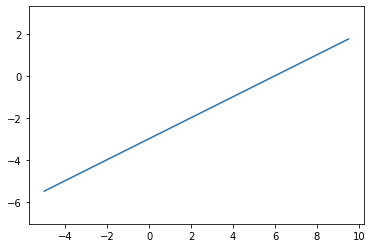

In [173]:
x = np.linspace(-5, 9.5, 9)
y = 0.5*x - 3
plt.plot(x, y)
plt.axis('equal')

In [174]:
# Гауссова случайная величина. Нормальное распределение.
np.random.randn()

-0.02729367229077773

In [175]:
# Добавим шума к данным.
yy = y + np.random.randn()

(-5.725, 10.225, -7.012282434354398, 0.9627175656456022)

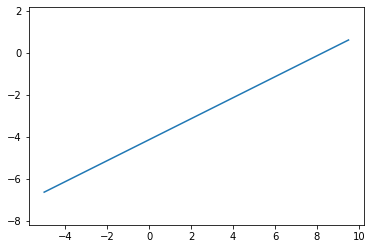

In [176]:
plt.plot(x, yy) # Нарисуем график.
plt.axis('equal') # Оси будут иметь один масштаб.
# Чего-то не видна шума.

In [177]:
yy[3]-y[3], yy[1]-y[1]
# Видно, что ко всем зачениям y была добавлена одна и та же случайная величина.

(-1.1497824343543979, -1.1497824343543979)

In [178]:
# Теперь создадим массив из случайных величин.
yy = y + np.random.randn( y.shape[0] ) # В скобках размер.

(-5.725, 10.225, -4.846141241175901, 0.7683373978726344)

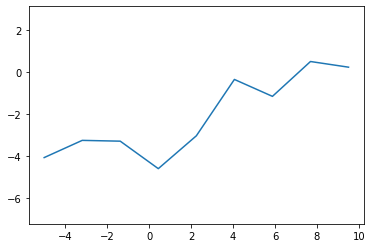

In [179]:
plt.plot(x, yy)
plt.axis('equal')

(-5.725, 10.225, -5.809703294408208, 2.6144316260367284)

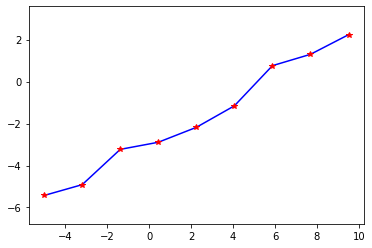

In [180]:
yy = y + np.random.randn( y.shape[0] )/3 # По-меньше шум.
plt.plot(x, yy, '-b')
plt.plot(x, yy, '*r')
plt.axis('equal')

In [181]:
# Создаем общую матрицу. Присваеваем её переменной A.
A = np.array( [np.ones_like(x), x ] )
A

array([[ 1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,
         1.    ,  1.    ],
       [-5.    , -3.1875, -1.375 ,  0.4375,  2.25  ,  4.0625,  5.875 ,
         7.6875,  9.5   ]])

In [182]:
A = A.T # Транспонирование.
A # b + a*x_i = y_i, i=1 до n

array([[ 1.    , -5.    ],
       [ 1.    , -3.1875],
       [ 1.    , -1.375 ],
       [ 1.    ,  0.4375],
       [ 1.    ,  2.25  ],
       [ 1.    ,  4.0625],
       [ 1.    ,  5.875 ],
       [ 1.    ,  7.6875],
       [ 1.    ,  9.5   ]])

In [183]:
yy

array([-5.42678807, -4.91206543, -3.23072755, -2.89235947, -2.18179093,
       -1.15625883,  0.75652464,  1.2967952 ,  2.2315164 ])

In [184]:
# Матрица прямоугольная.
A.shape # Значит обратной не существует.

(9, 2)

In [185]:
np.linalg.inv(A)

LinAlgError: Last 2 dimensions of the array must be square

In [186]:
# Вычисляем псевдо обратную матрицу от A. Метод решения обычных систем не годится.
AA = np.linalg.pinv(A)
AA.shape

(2, 9)

In [187]:
AA.dot(yy) # Домножаем на значения
# и получаем коэффициенты исходного уравнения.

array([-2.94398335,  0.5422566 ])

In [188]:
S, Di, V = np.linalg.svd(A)
S.shape, V.shape

((9, 9), (2, 2))

In [189]:
Di

array([15.63373772,  2.69408984])

In [190]:
D = np.diag(Di)
D

array([[15.63373772,  0.        ],
       [ 0.        ,  2.69408984]])

In [191]:
S.dot( D )

ValueError: shapes (9,9) and (2,2) not aligned: 9 (dim 1) != 2 (dim 0)

In [192]:
S[:,:2].dot( D ).dot(V)

array([[ 1.    , -5.    ],
       [ 1.    , -3.1875],
       [ 1.    , -1.375 ],
       [ 1.    ,  0.4375],
       [ 1.    ,  2.25  ],
       [ 1.    ,  4.0625],
       [ 1.    ,  5.875 ],
       [ 1.    ,  7.6875],
       [ 1.    ,  9.5   ]])

In [193]:
A

array([[ 1.    , -5.    ],
       [ 1.    , -3.1875],
       [ 1.    , -1.375 ],
       [ 1.    ,  0.4375],
       [ 1.    ,  2.25  ],
       [ 1.    ,  4.0625],
       [ 1.    ,  5.875 ],
       [ 1.    ,  7.6875],
       [ 1.    ,  9.5   ]])

In [194]:
np.linalg.eig(A)

LinAlgError: Last 2 dimensions of the array must be square

Упр. Нарисуй график данной прямой. Лучше поверх исходных данных.

Построение контуров

In [195]:
x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
xx, yy = np.meshgrid(x, y, sparse=True)

In [196]:
z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)

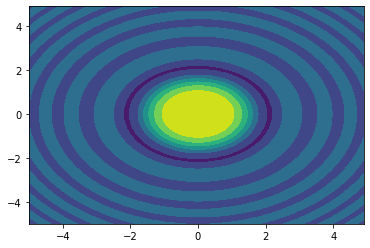

In [197]:
h = plt.contourf(x, y, z)